In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv("Sport car price.csv")
data.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [3]:
data.isna().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

In [4]:
df =data.copy()

**Engine Size (L)**

In [5]:
def EngineSize(engine):
    if ("Hybrid" in engine) or ("Electric" in engine) or ('-' in engine):
        return 0.0
    else:
        return float(engine)

In [6]:
df["Engine Size (L)"] = df["Engine Size (L)"].fillna("0")
df["Engine Size (L)"] = df["Engine Size (L)"].apply(EngineSize)

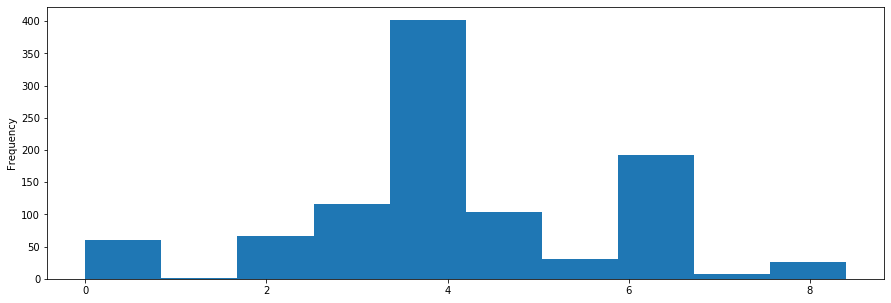

In [7]:
df["Engine Size (L)"].plot.hist(figsize=(15,5))

**Horsepower**

In [8]:
def Horsep(h):
    if ("+" in h):
        return int(h[:-1].replace(',',''))
    else:
        return int(h.replace(',',''))

In [9]:
df["Horsepower"] = df["Horsepower"].apply(Horsep)

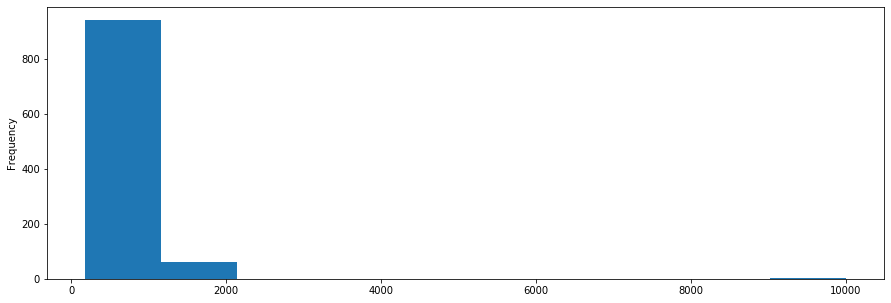

In [10]:
df["Horsepower"].plot.hist(figsize=(15,5))

**Torque (lb-ft)**

In [11]:
df[df["Torque (lb-ft)"].isna()==True]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
642,Tesla,Model S Plaid,2021,0.0,1020,NaN,1.9,"139,990"
878,Maserati,GranTurismo,2021,0.0,550,NaN,2.8,"200,000"
916,Tesla,Roadster,2022,0.0,10000,NaN,1.9,"200,000"


on connait pas la valuer judicieuse pour ces trois voitures : c'est mieux de les supprimer

In [12]:
df = df[df["Torque (lb-ft)"].isna()==False]

In [13]:
def Torque(t):
    if "+" in t or '-' in t or t=='0':
        return 0
    else:
        return int(t.replace(',',''))

In [14]:
df["Torque (lb-ft)"] = df["Torque (lb-ft)"].apply(Torque)
df = df[df["Torque (lb-ft)"]!=0]

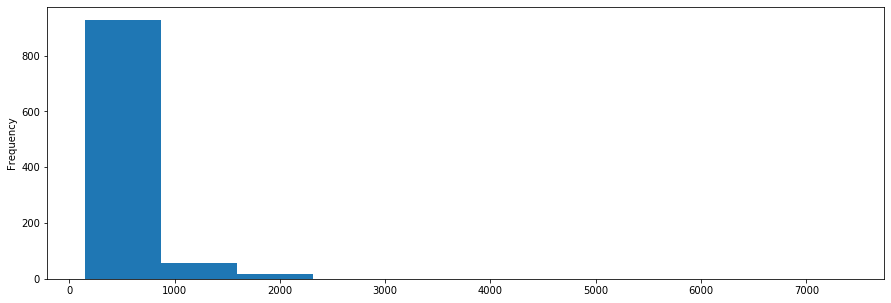

In [15]:
df["Torque (lb-ft)"].plot.hist(figsize=(15, 5))

**0-60 MPH Time (seconds)**

In [16]:
def speed(s):
    if  "<" in s:
        return float(s[-2:])
    else:
        return float(s.replace(',',''))

In [17]:
df["0-60 MPH Time (seconds)"] = df["0-60 MPH Time (seconds)"].apply(speed)


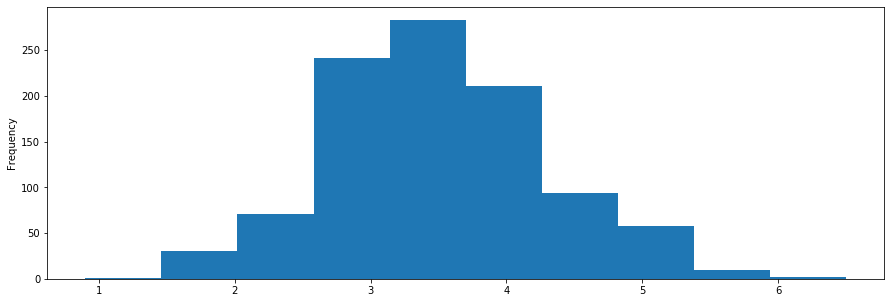

In [18]:
df["0-60 MPH Time (seconds)"].plot.hist(figsize=(15,5))

**Price (in USD)**

In [19]:
def price(p):
    return int(p.replace(',',''))

In [20]:
df['Price (in USD)'] = df['Price (in USD)'].apply(price)

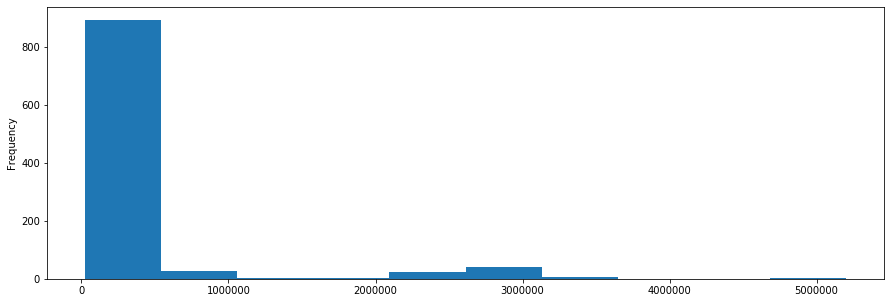

In [21]:
df['Price (in USD)'].plot.hist(figsize=(15,5))

In [22]:
print('Min Price (in USD) = ', min(df['Price (in USD)']))
print('Max Price (in USD) = ', max(df['Price (in USD)']))

Min Price (in USD) =  25000
Max Price (in USD) =  5200000


In [23]:
df.isnull().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

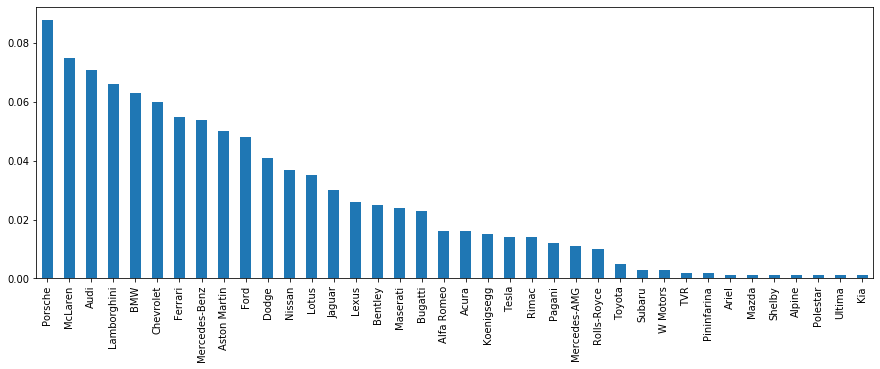

In [29]:
df["Car Make"].value_counts(normalize=True).plot.bar(figsize=(15,5))

In [31]:
df['Year'].value_counts(normalize=True)

2021    0.573427
2022    0.377622
2020    0.024975
2015    0.011988
2023    0.002997
2019    0.002997
2017    0.002997
2014    0.001998
1965    0.000999
Name: Year, dtype: float64

In [32]:
df.shape

(1001, 8)

**Training model**

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.